In [1]:
!pip install neuralprophet

In [23]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

import pickle
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

## Loading the dataset

In [24]:
import pandas as pd
df = pd.read_csv("Adilabad.csv")
df

,District,date,min-temp,max-temp
0,Adilabad,2020-11-12,18.88,32.70
1,Adilabad,2020-05-14,26.93,38.38
2,Adilabad,2022-12-31,17.89,35.05
3,Adilabad,2022-12-30,16.94,34.27
4,Adilabad,2022-12-29,19.48,34.63
...,...,...,...,...
1329,Adilabad,2019-01-05,14.59,34.63
1330,Adilabad,2019-01-04,15.27,34.60
1331,Adilabad,2019-01-03,13.50,35.28
1332,Adilabad,2019-01-02,12.32,32.10


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   District  1334 non-null   object 
 1   date      1334 non-null   object 
 2   min-temp  1334 non-null   float64
 3   max-temp  1334 non-null   float64
dtypes: float64(2), object(2)
memory usage: 41.8+ KB


In [27]:
df.dtypes

District     object
date         object
min-temp    float64
max-temp    float64
dtype: object

In [28]:
df ['date'] = pd.to_datetime(df ['date'])
df.tail()

,District,date,min-temp,max-temp
1329,Adilabad,2019-01-05,14.59,34.63
1330,Adilabad,2019-01-04,15.27,34.60
1331,Adilabad,2019-01-03,13.50,35.28
1332,Adilabad,2019-01-02,12.32,32.10
1333,Adilabad,2019-01-01,11.03,30.31


In [29]:
new_column = df[['date', 'max-temp']] 
new_column.dropna(inplace=True)
new_column.columns = ['ds', 'y'] 
new_column.tail()

WARNING - (py.warnings._showwarnmsg) - C:\Users\ASUS\AppData\Local\Temp\ipykernel_29396\1589704528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_column.dropna(inplace=True)



,ds,y
1329,2019-01-05,34.63
1330,2019-01-04,34.60
1331,2019-01-03,35.28
1332,2019-01-02,32.10
1333,2019-01-01,30.31


# Training the forecasting model

In [30]:
NP = NeuralProphet()

In [32]:
model = NP.fit(new_column, freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.325% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (42) is too small than the required number for the learning rate finder (228). The results might not be optimal.


Finding best initial lr:   0%|          | 0/228 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

# Forecasting the temperature into the future

In [33]:
future = NP.make_future_dataframe(new_column, periods=370)
forecast = NP.predict(future)
forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 99.025% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency -1D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.73% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.73% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 42it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2023-01-01,None,31.85,36.36,-4.52,0.01
1,2023-01-02,None,31.74,36.36,-4.54,-0.08
2,2023-01-03,None,31.76,36.37,-4.56,-0.05
3,2023-01-04,None,31.92,36.37,-4.57,0.12
4,2023-01-05,None,31.93,36.37,-4.57,0.12
...,...,...,...,...,...,...
365,2024-01-01,None,32.84,37.43,-4.51,-0.08
366,2024-01-02,None,32.85,37.44,-4.54,-0.05
367,2024-01-03,None,33.01,37.44,-4.55,0.12
368,2024-01-04,None,33.00,37.44,-4.56,0.12


# visualize these predictions


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


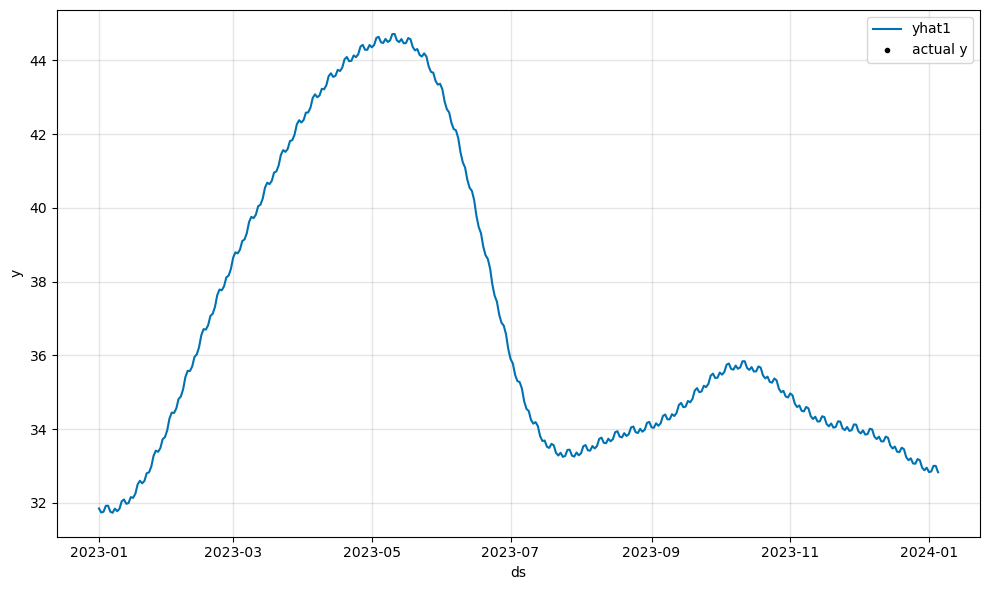

In [34]:
plot = NP.plot(forecast)

In [35]:
Adilabad_forecast = forecast[['ds', 'yhat1']]
Adilabad_forecast = Adilabad_forecast[:365]

# Daily-Prediction

In [36]:

data= Adilabad_forecast[['ds', 'yhat1']] 
data.dropna(inplace=True)
data.columns = ['date', 'Temp'] 
data.tail()

,date,Temp
360,2023-12-27,33.19
361,2023-12-28,33.16
362,2023-12-29,32.96
363,2023-12-30,32.89
364,2023-12-31,32.96


In [37]:
data.to_csv('Adilabad2023.csv')